### Importing necessary libraries

In [2]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
import os

In [3]:
data = pd.read_csv(r"C:\Users\HP\Documents\Data science projects\Startup prcatice project\data\startup_growth_investment_data.csv")
data.head()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


### Descriptive analysis on dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   float64
 4   Valuation (USD)          5000 non-null   float64
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 351.7+ KB


In [6]:
data.describe()

,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Year Founded,Growth Rate (%)
count,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.491600,2.455567e+09,7.971059e+09,25.542000,2011.544000,102.091732
std,2.913353,1.423787e+09,5.479487e+09,14.271838,6.885285,56.179781
min,1.000000,1.102610e+06,1.722547e+06,1.000000,2000.000000,5.060000
25%,3.000000,1.221506e+09,3.598305e+09,13.000000,2006.000000,52.815000
50%,6.000000,2.460634e+09,7.002304e+09,25.000000,2012.000000,102.215000
75%,8.000000,3.639951e+09,1.147676e+10,38.000000,2018.000000,150.580000
max,10.000000,4.999544e+09,2.470906e+10,50.000000,2023.000000,199.970000


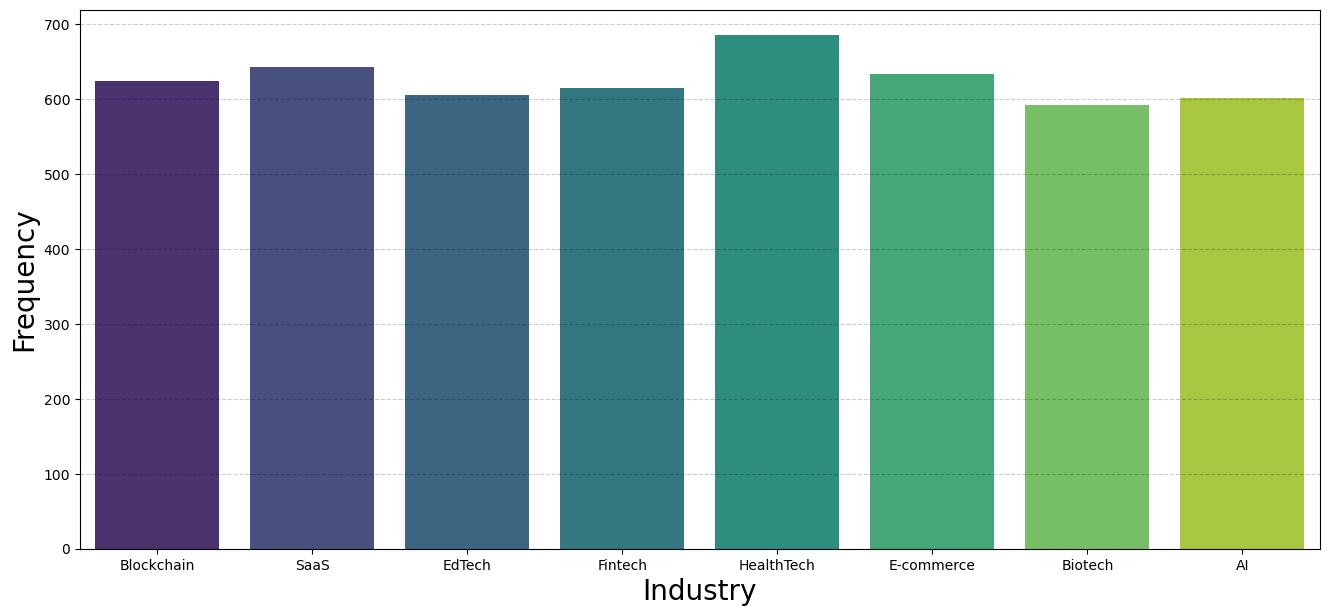

In [7]:
plt.figure(figsize = (16, 7))
plt.xlabel('Industry', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.grid(axis='y', linestyle='--', alpha=0.2, color = 'black')
sns.countplot(data = data, x = 'Industry', hue = 'Industry', palette = 'viridis');

In [8]:
data.groupby('Industry')['Industry'].aggregate({'count'}).sort_values(by = 'count', ascending = False)

,count
Industry,
HealthTech,685
SaaS,643
E-commerce,633
Blockchain,624
Fintech,615
EdTech,606
AI,602
Biotech,592


#### Industry & Investment Analysis

 **1.Which industry attracts the most investment?**

In [11]:
investment_per_industry = data.groupby('Industry')['Investment Amount (USD)'].agg({'sum'}).sort_values(by = 'sum', ascending = True)

In [12]:
investment_per_industry

,sum
Industry,
Biotech,1.459002e+12
EdTech,1.477203e+12
AI,1.477378e+12
Blockchain,1.538138e+12
Fintech,1.550977e+12
SaaS,1.559877e+12
E-commerce,1.578695e+12
HealthTech,1.636565e+12


<Figure size 1600x700 with 0 Axes>

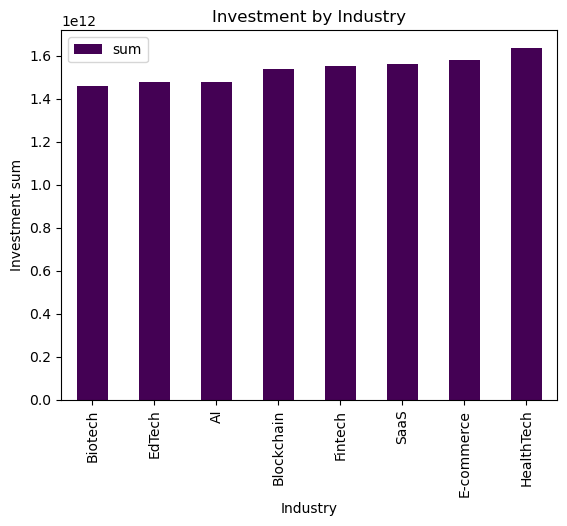

In [13]:
plt.figure(figsize = (16, 7))
investment_per_industry.plot(kind = 'bar', xlabel = 'Industry', ylabel = 'Investment sum', cmap = 'viridis')
plt.title('Investment by Industry');

**Answer:** *HealthTech attracts the most investment*

**2.What industry has the highest average growth rate?**

In [16]:
average_growth_rate = data.groupby('Industry')['Growth Rate (%)'].mean().sort_values()
average_growth_rate

Industry
Biotech        97.580912
HealthTech    100.158599
AI            100.726312
E-commerce    101.501153
SaaS          103.100980
Blockchain    103.322821
Fintech       105.163675
EdTech        105.200693
Name: Growth Rate (%), dtype: float64

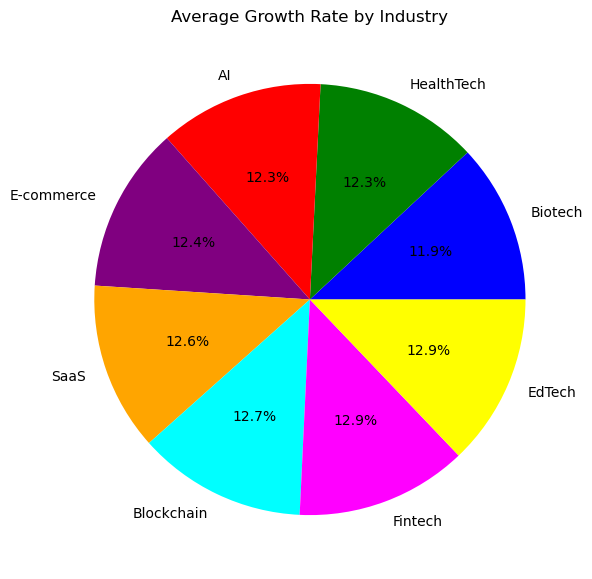

In [17]:
plt.figure(figsize = (16, 7))
plt.pie(average_growth_rate, labels=average_growth_rate.index, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
plt.title("Average Growth Rate by Industry");

In [18]:
print(f'{average_growth_rate.idxmax()} has the highest growth rate of {average_growth_rate.max()}')

EdTech has the highest growth rate of 105.20069306930694


**Answer:** *EdTech has the most average growth rate*

 **3.Which industries require fewer funding rounds to achieve high valuations?**

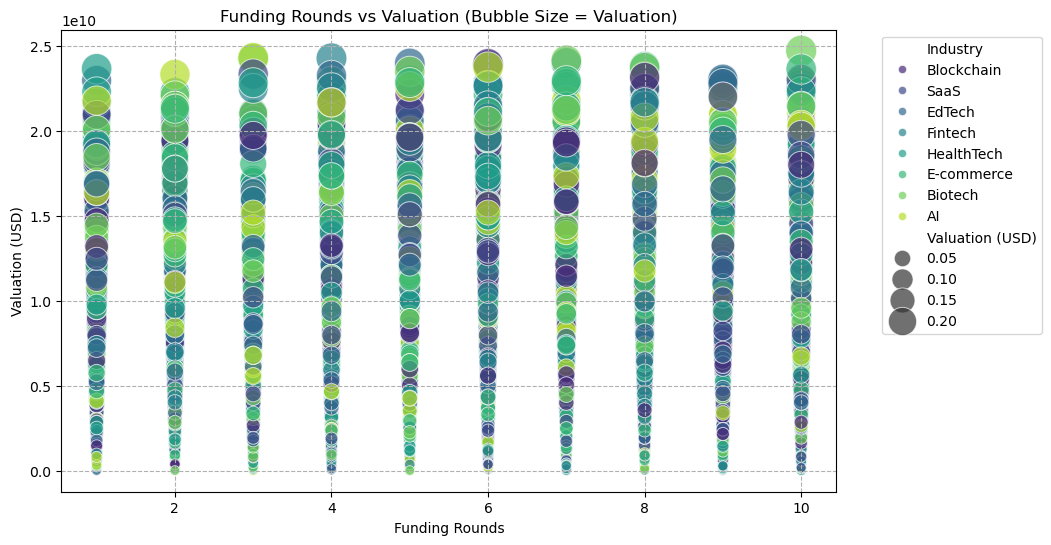

In [21]:
plt.figure(figsize=(10, 6))
sizes = data["Valuation (USD)"] / 1e11  # Scaling bubble size
sns.scatterplot(x="Funding Rounds", y="Valuation (USD)", hue=data.Industry, palette = 'viridis', size=sizes, sizes=(50, 500), alpha=0.7, data=data)
plt.xlabel("Funding Rounds")
plt.ylabel("Valuation (USD)")
plt.title("Funding Rounds vs Valuation (Bubble Size = Valuation)")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle = '--')
plt.show()

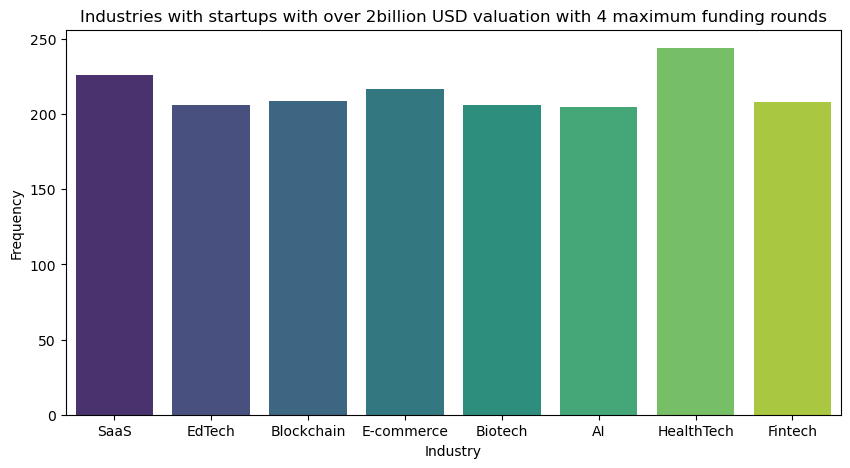

In [22]:
least_funding_rounds = data.query("`Funding Rounds` <= 4 and `Valuation (USD)` >= 2.0e9")[['Industry']]
least_funding_rounds
plt.figure(figsize = (10, 5))
sns.countplot(data = least_funding_rounds, x = 'Industry', hue = 'Industry', palette = 'viridis')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.title('Industries with startups with over 2billion USD valuation with 4 maximum funding rounds');

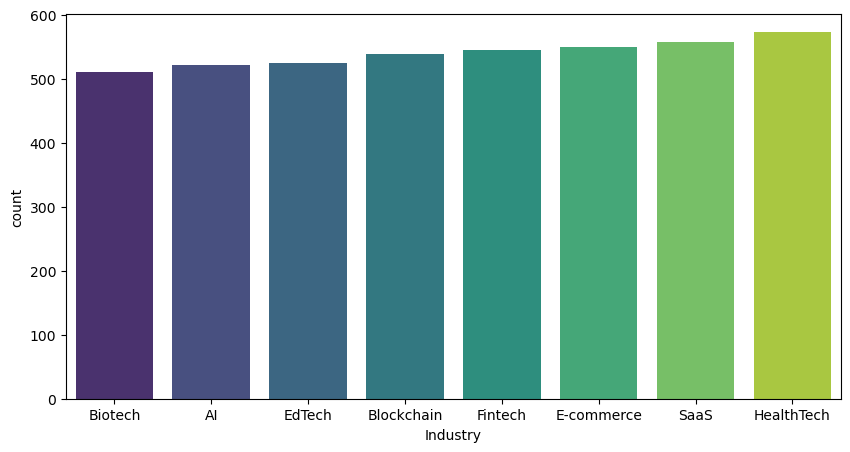

In [23]:
highest_valuation = data.query('`Valuation (USD)` >= 2.0e9')[['Industry', 'Startup Name']]
rr = highest_valuation.groupby('Industry')['Startup Name'].agg({'count'}).sort_values(by = 'count')
plt.figure(figsize = (10, 5))
sns.barplot(data = rr, x = 'Industry', y = 'count', hue = 'Industry', palette = 'viridis' );

**Answer:**       
                1.Industries like Saas and HealthTech have more startups reaching high valuations with fewer rounds of 1-4.  
                2.Fintech and E-commerce likely require more rounds of funding to scale to high valuations.  
                3. HealthTech has the most valuation of 2billion

 **4.Which industry has the most investors?**

In [26]:
print(data['Number of Investors'].min(), data['Number of Investors'].max())

1 50


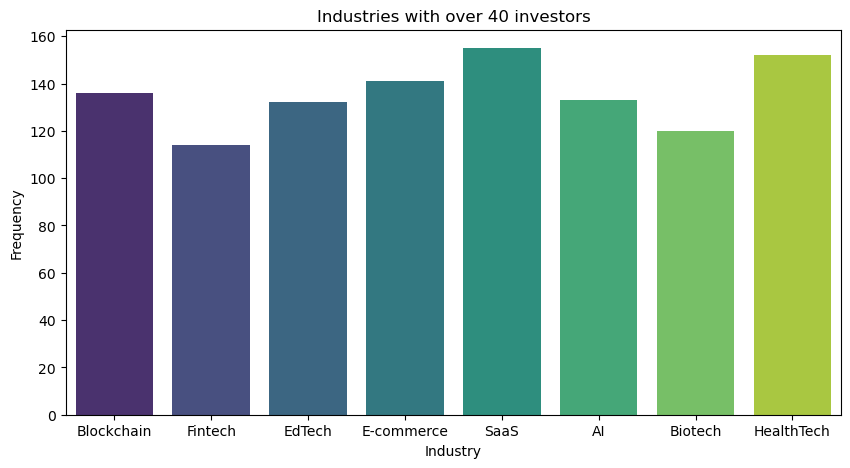

In [27]:
high_investors = data[data['Number of Investors'] >= 40][['Industry']]
plt.figure(figsize = (10, 5))
sns.countplot(data = high_investors, x = 'Industry', hue = 'Industry', palette = 'viridis')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.title('Industries with over 40 investors');

**Answer:**       
                1.Every Industry has a high investing power of over 100       
                2.HealthTech and SaaS shows most investing while Fintech shows less investing  

#### Geographical Trends

 **1.Which countries have the most well-funded startups?**

In [31]:
data.head()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


In [32]:
country_list = data['Country'].unique()
country_list

array(['Germany', 'UK', 'Singapore', 'France', 'India', 'Brazil', 'USA',
       'Canada', 'China', 'Australia'], dtype=object)

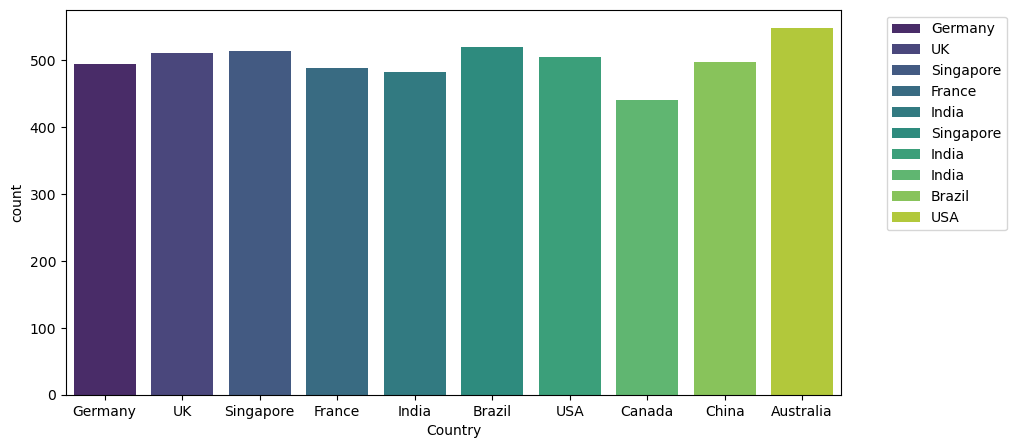

In [33]:
plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = 'Country', hue = 'Country', palette = 'viridis')
plt.legend(data['Country'], bbox_to_anchor = (1.05, 1));

In [34]:
data.groupby('Country').count()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Year Founded,Growth Rate (%)
Country,,,,,,,,
Australia,548,548,548,548,548,548,548,548
Brazil,520,520,520,520,520,520,520,520
Canada,441,441,441,441,441,441,441,441
China,497,497,497,497,497,497,497,497
France,489,489,489,489,489,489,489,489
Germany,495,495,495,495,495,495,495,495
India,483,483,483,483,483,483,483,483
Singapore,513,513,513,513,513,513,513,513
UK,510,510,510,510,510,510,510,510


**This is to check if there's much difference in the observations in respect to the country feature, Canada has the least entry of 441 and Australia the most, of 548**

In [36]:
data['Investment Amount (USD)'].max()

4999543707.18

In [37]:
high_investment = data[data['Investment Amount (USD)'] >= 4.0e9][['Country', 'Industry']].reset_index(drop = True)
high_investment.head()

,Country,Industry
0,France,Fintech
1,India,Blockchain
2,USA,Fintech
3,India,Blockchain
4,Singapore,EdTech


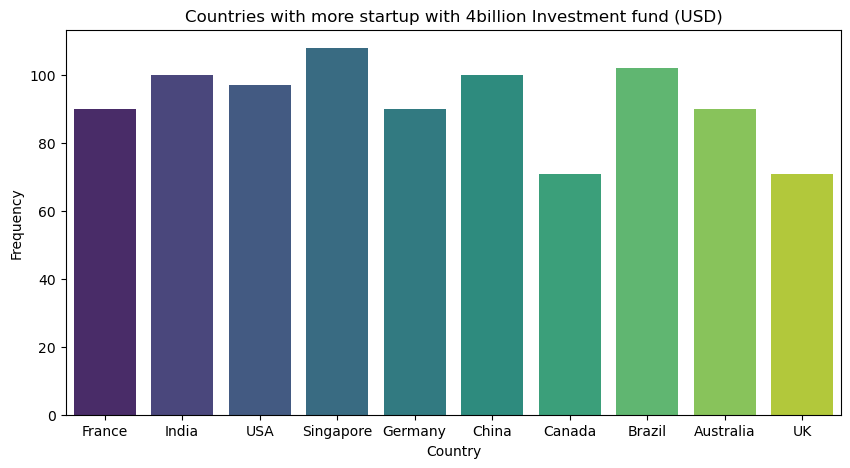

In [38]:
plt.figure(figsize = (10, 5))
sns.countplot(data = high_investment, x = 'Country', hue = 'Country', palette = 'viridis')
plt.ylabel('Frequency')
plt.title('Countries with more startup with 4billion Investment fund (USD)');

In [39]:
high_investment.groupby('Country').count().sort_values(by = 'Industry')

,Industry
Country,
Canada,71
UK,71
Australia,90
France,90
Germany,90
USA,97
China,100
India,100
Brazil,102


**Answer:**       
                1.Singapore had more startups with high investment of 108 between 2000-2023    
                2.Canada and UK shows the least  

**2.What are the most common startup types in different countries?**

In [42]:
industry_counts = data.groupby(["Country", "Industry"]).size().reset_index(name="Count")
industry_counts.head()

,Country,Industry,Count
0,Australia,AI,70
1,Australia,Biotech,58
2,Australia,Blockchain,58
3,Australia,E-commerce,74
4,Australia,EdTech,73


In [43]:
pivot_df = industry_counts.pivot(index="Industry", columns="Country", values="Count")
pivot_df.head()

Country,Australia,Brazil,Canada,China,France,Germany,India,Singapore,UK,USA
Industry,,,,,,,,,,
AI,70,65,49,61,53,70,48,58,65,63
Biotech,58,62,40,65,70,64,55,66,50,62
Blockchain,58,82,47,63,68,66,43,70,65,62
E-commerce,74,56,63,57,67,65,58,68,65,60
EdTech,73,63,57,54,53,53,65,54,76,58


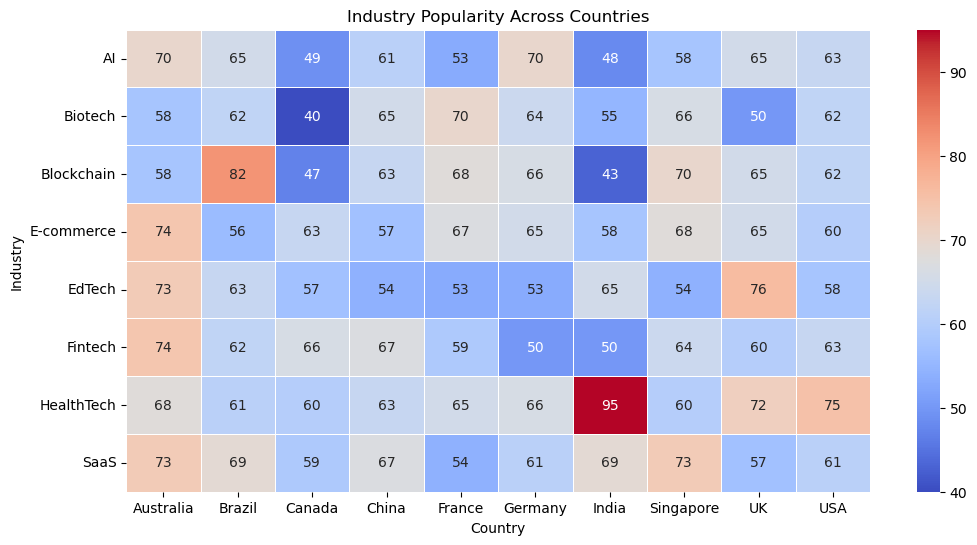

In [44]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Industry Popularity Across Countries")
plt.xlabel("Country")
plt.ylabel("Industry")
plt.show()

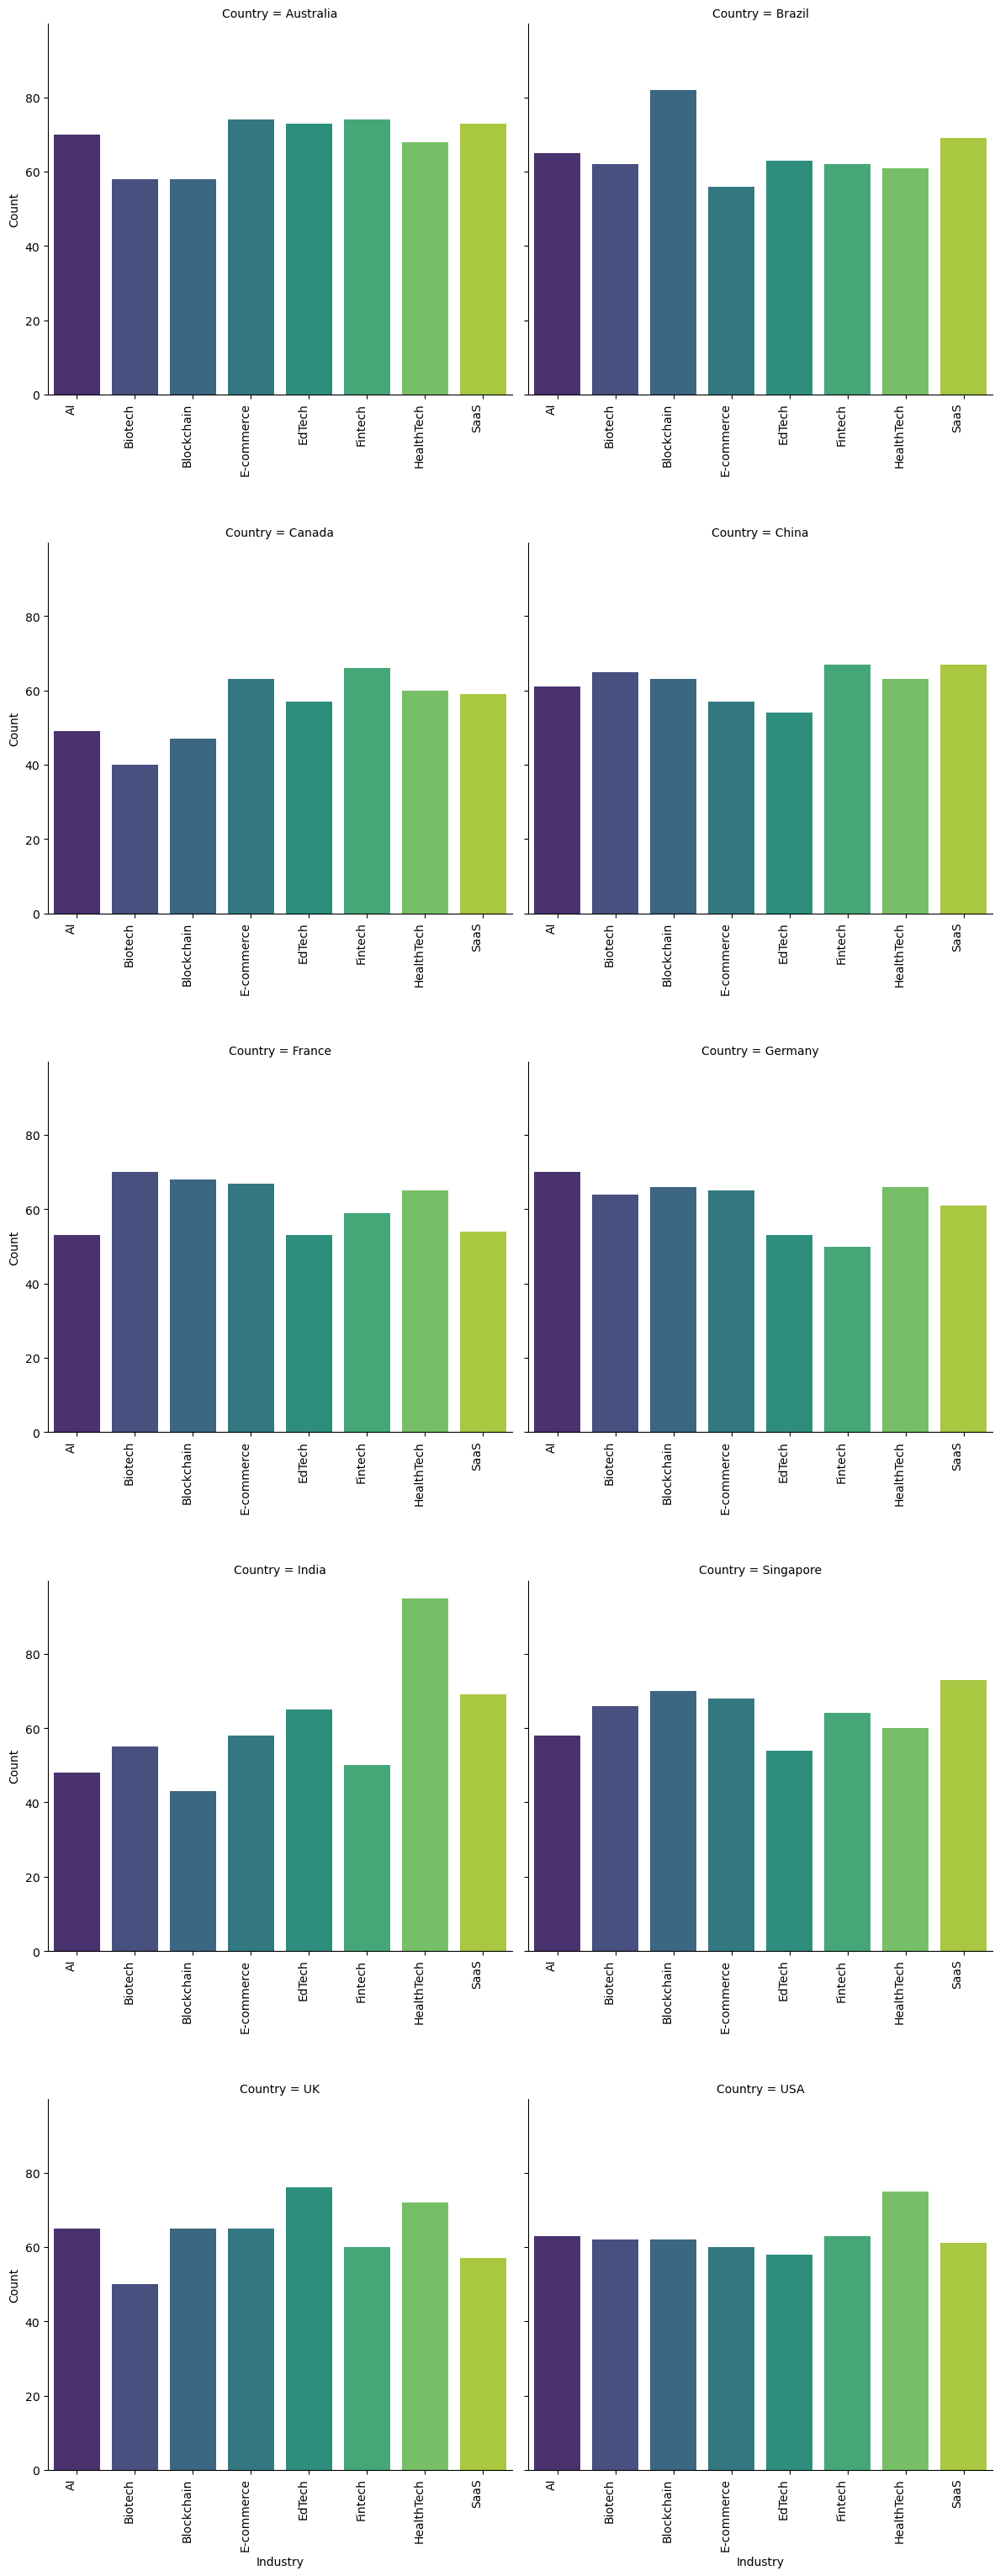

In [45]:
# Create a multi-layered bar chart using FacetGrid
g = sns.FacetGrid(industry_counts, col="Country", col_wrap=2, height = 6, sharex=False, sharey=True)
g.map_dataframe(sns.barplot, x="Industry", y="Count",hue = 'Industry', palette="viridis")

# Rotate x-axis labels for better visibility
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adjust layout
plt.subplots_adjust(hspace=0.4)
plt.show()

In [46]:
industry_counts.loc[industry_counts.groupby("Country")["Count"].idxmax(), ["Country", "Industry", "Count"]].set_index('Country')

,Industry,Count
Country,,
Australia,E-commerce,74
Brazil,Blockchain,82
Canada,Fintech,66
China,Fintech,67
France,Biotech,70
Germany,AI,70
India,HealthTech,95
Singapore,SaaS,73
UK,EdTech,76


**3.Does the country affect the growth rate of startups?**

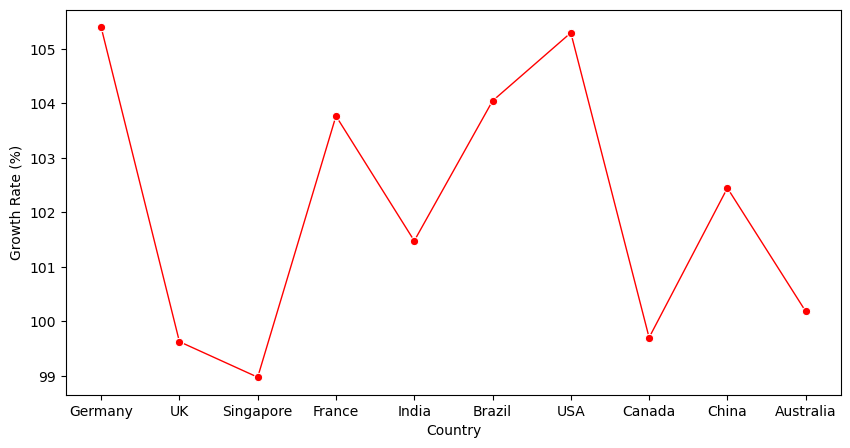

In [48]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = data, x = 'Country', y = 'Growth Rate (%)', errorbar = None, marker = 'o', linewidth = 1, color = 'red');

Hypothesis Testing:  
1. Defining Null and alternative hypothesis  
   ----Null hypothesis, H_0: The country does not affect the growth rate of startups  
   ----Alternative hypothesis, H_1: The residing country does affect the growth rate of startups


2. Checking for normality using shapiro test

In [51]:
for country in data["Country"].unique():
    dd = data[data["Country"] == country]["Growth Rate (%)"]  
    stat, p_value = shapiro(dd) 
    print(f"{country}: p-value = {p_value}")

Germany: p-value = 6.174951392026405e-11
UK: p-value = 8.810050741997035e-11
Singapore: p-value = 1.5105194583368254e-12
France: p-value = 2.502440405198062e-11
India: p-value = 3.120844963330899e-10
Brazil: p-value = 1.9351473161764583e-12
USA: p-value = 1.4985221434744713e-11
Canada: p-value = 3.1994790572445966e-10
China: p-value = 3.6327071780002157e-12
Australia: p-value = 1.1102729567596529e-11


**Shapiro-Wilk** test strongly rejects the null hypothesis of normality for the growth rate distribution in each country. This suggests that the growth rate data is **not normally distributed for any of the countries**.

3. Non parametric Anova: **Krukal Wallis** test since **normality is not met**.  
    **Does not** require **equality of variance**

In [54]:
from scipy.stats import kruskal

In [55]:
growth_data = [data[data['Country'] == country]['Growth Rate (%)'] for country in data['Country'].unique()]

In [56]:
kruskal_stat, p_value = kruskal(*growth_data)
print(f"Kruskal-Wallis Test Statistic: {kruskal_stat}")
print(f"P-Value: {p_value}")

Kruskal-Wallis Test Statistic: 8.451116835790296
P-Value: 0.4893994930813679


**Answer:**  
        Since **p-value ≥ 0.05**, fail to reject the null hypothesis → **No significant difference in startup growth rates across       countries.**

🚨 Conclusion:  
➡ There is no statistically significant evidence that the country affects the growth rate of startups.  
➡ This means that the differences in growth rates between countries could be due to random chance rather than a real effect.  

 **4.How does startup valuation vary across different countries?**

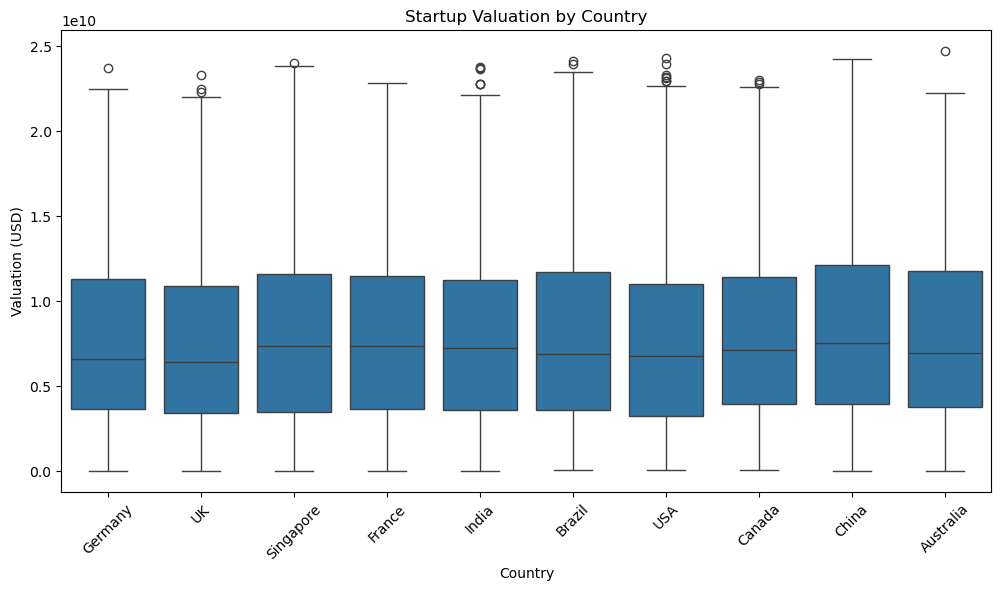

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Valuation (USD)', data=data)
plt.xticks(rotation=45)
plt.title("Startup Valuation by Country")
plt.show()


In [61]:
data.groupby('Country')['Valuation (USD)'].describe().sort_values(by = '50%', ascending = False)


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
China,497.0,8.386369e+09,5.719230e+09,2.188089e+07,3.925379e+09,7.550233e+09,1.210127e+10,2.426367e+10
France,489.0,8.031846e+09,5.341331e+09,8.933272e+06,3.678841e+09,7.365059e+09,1.151006e+10,2.283590e+10
Singapore,513.0,8.155135e+09,5.653340e+09,1.722547e+06,3.454222e+09,7.344950e+09,1.162145e+10,2.399023e+10
India,483.0,8.059270e+09,5.515473e+09,2.610585e+07,3.606228e+09,7.246597e+09,1.124526e+10,2.377280e+10
Canada,441.0,7.974363e+09,5.144230e+09,9.221241e+07,3.947563e+09,7.110260e+09,1.144704e+10,2.303626e+10
Australia,548.0,8.017226e+09,5.507713e+09,7.296378e+06,3.786988e+09,6.965979e+09,1.179938e+10,2.470906e+10
Brazil,520.0,8.101398e+09,5.623422e+09,8.348998e+07,3.584504e+09,6.868415e+09,1.170838e+10,2.414232e+10
USA,504.0,7.740191e+09,5.603796e+09,6.223745e+07,3.239769e+09,6.802348e+09,1.103443e+10,2.428925e+10
Germany,495.0,7.721917e+09,5.316144e+09,1.890381e+07,3.674126e+09,6.597968e+09,1.127603e+10,2.374517e+10


**Answer:**  
            1.Countries like China, France, Singapore and India has highest median of over 7billion values meaning startup thrive in these countires  
            2. There's no much variation between each country median values

## Inferential analysis on dataset

#### Funding & Growth Correlations

**1.How does funding amount impact startup valuation?**

In [66]:
data.columns

Index(['Startup Name', 'Industry', 'Funding Rounds', 'Investment Amount (USD)',
       'Valuation (USD)', 'Number of Investors', 'Country', 'Year Founded',
       'Growth Rate (%)'],
      dtype='object')

In [67]:
data['Investment Amount (USD)'].corr(data['Valuation (USD)'])

0.8466722515612715

**0.84667 shows a very high correlation between Investment Amount and Valuation**

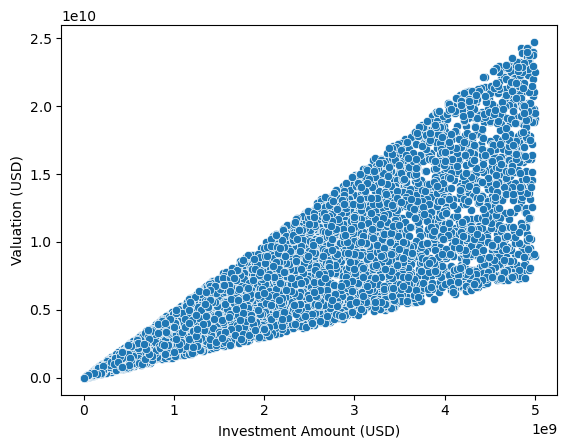

In [69]:
sns.scatterplot(data = data, y = 'Valuation (USD)', x = 'Investment Amount (USD)');

**Scatterplot confirms correlation value**

In [71]:
X = data[['Investment Amount (USD)']]
y = data['Valuation (USD)']

In [72]:
model = LinearRegression()

In [73]:
model.fit(X, y)

LinearRegression()

In [74]:
m = model.coef_[0].round(2)

In [75]:
c = model.intercept_.round()

In [76]:
print(f'y = {m}X + ({c}) shows how funding impact startup valuation')

y = 3.26X + (-30266492.0) shows how funding impact startup valuation


In [77]:
import statsmodels.api as sm
model2 = sm.OLS(y, X)
results = model2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Valuation (USD)   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          5.002e+04
Date:                Wed, 02 Apr 2025   Prob (F-statistic):                        0.00
Time:                        06:59:46   Log-Likelihood:                     -1.1606e+05
No. Observations:                5000   AIC:                                  2.321e+05
Df Residuals:                    4999   BIC:                                  2.321e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

**Since P < 0.05 at 0.000 we reject the null and establish that there's a strong association between these features**

**2.Does the amount of investment affect the growth rate?**

Null: Investment does not affect the growth rate  
Alternative: Investment does affect the growth rate

In [81]:
X = data['Investment Amount (USD)']
y = data['Growth Rate (%)']

In [82]:
from scipy.stats import pearsonr
stats, p = pearsonr(X, y)
if p >= 0.05:
    print(f'Fail to reject null as {p} is greater than 0.05 and PearsonR coeff = {stats}')
else:
    print(f'Reject null as {p} is less than 0.05')


Fail to reject null as 0.31198981792685127 is greater than 0.05 and PearsonR coeff = -0.014301330038385174


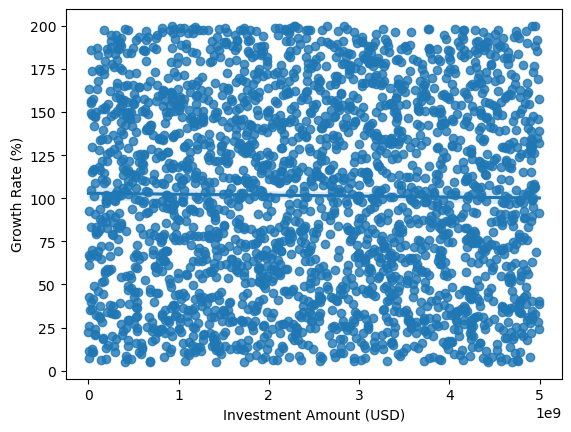

In [83]:
sns.regplot(x = data['Investment Amount (USD)'][0:int((len(data))/2)], y = data['Growth Rate (%)'][0:int((len(data))/2)]);

**Answer:** Investment amount does not affect growth rate

**3.Does the number of investors influence startup growth?**

In [86]:
# categorize number of investors to low, medium and high

In [87]:
data['Investors category'] = pd.cut(data['Number of Investors'], labels = ['low', 'medium', 'high'], bins = [1, 17, 34, 50], include_lowest = True)
data.head()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%),Investors category
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10,high
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52,high
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47,high
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44,high
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00,high


Null: No of investors does not affect/influence startup growth  
Alternative: No of investors influence startup growth

In [89]:
# checking for normality using shapiro test

In [90]:
for category in data['Investors category'].unique():
    pr = data[data['Investors category'] == category]['Growth Rate (%)']
    stats, p = shapiro(pr)
    print(f'{category} has p-value = {p}')

high has p-value = 1.4296320966736762e-21
medium has p-value = 2.950758563046726e-23
low has p-value = 6.579485248837863e-22


In [91]:
# analyzing with kruskal-wallis

In [92]:
from scipy.stats import kruskal

In [93]:
investors_growth = [data[data['Investors category'] == category]['Growth Rate (%)'] for category in data['Investors category'].unique()]

In [94]:
stats, p = kruskal(*investors_growth)
print(f'Test statistics: {stats}')
print(f'P-value: {p}')

Test statistics: 1.281362516252692
P-value: 0.5269333241279648


Since the p-value (0.5269) is greater than the alpha value (0.05), we fail to reject the null hypothesis. This means that there is not enough statistical evidence to support the alternative hypothesis (𝐻1​).

**Answer:** The amount of investors does not affect the growth rate

 **4.Does the year a startup was founded affect its growth rate?**

In [98]:
data['Year Founded'].nunique()

24

In [99]:
# checking for normality using shapiro test

In [100]:
for year in data['Year Founded'].unique():
    yr = data[data['Year Founded'] == year]['Growth Rate (%)']
    stats, p = shapiro(yr)
    print(f'{year} has the P-value for normality = {p}')

2012 has the P-value for normality = 3.96459964445559e-06
2006 has the P-value for normality = 2.1103851602679196e-06
2016 has the P-value for normality = 4.430512097231396e-06
2021 has the P-value for normality = 8.627822219369798e-06
2011 has the P-value for normality = 2.7468789598138355e-06
2003 has the P-value for normality = 2.788325972513177e-07
2017 has the P-value for normality = 2.4557905575507664e-06
2007 has the P-value for normality = 2.8656884316949562e-06
2000 has the P-value for normality = 1.1488971854874755e-06
2019 has the P-value for normality = 2.0932338120995854e-08
2009 has the P-value for normality = 0.00019634711222498403
2008 has the P-value for normality = 8.778001320739905e-07
2010 has the P-value for normality = 2.688894248748631e-07
2013 has the P-value for normality = 9.075440075529879e-07
2001 has the P-value for normality = 1.296354628665796e-06
2014 has the P-value for normality = 1.1748819742105798e-05
2002 has the P-value for normality = 3.0300914574

In [101]:
# None of these are normally distributed

In [102]:
#analysing using kruskal wallis

In [103]:
from scipy.stats import kruskal

In [104]:
yrs = [data[data['Year Founded'] == yr]['Growth Rate (%)'] for yr in data['Year Founded'].unique()]

In [105]:
stats, p = kruskal(*yrs)
print(f'Test statistics: {stats}')
print(f'P-value: {p}')

Test statistics: 26.1843876934964
P-value: 0.2922390076538821


Since the p-value (0.5269) is greater than the alpha value (0.05), we fail to reject the null hypothesis. This means that there is not enough statistical evidence to support the alternative hypothesis (H1​).

**Answer:** Founded Year does not affect Growth Rate (%)

### Comparative & Predictive Insights

**1.What are the characteristics of the most successful startups?**

In [110]:
# Successful startups can be identified with the Valuation of the startup

In [111]:
# Top 10% companies with highest valuation
high_startup = data.sort_values(by = 'Valuation (USD)', ascending = False).head(int(0.1 * len(data))).reset_index(drop = True)
high_startup

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%),Investors category
0,Startup_436,Biotech,10,4.991897e+09,2.470906e+10,13,Australia,2019,157.62,low
1,Startup_2375,AI,3,4.914634e+09,2.428925e+10,20,USA,2007,31.96,medium
2,Startup_1413,Fintech,4,4.918505e+09,2.426367e+10,35,China,2000,29.83,high
3,Startup_790,E-commerce,3,4.850129e+09,2.422732e+10,28,China,2011,48.54,medium
4,Startup_1979,Biotech,7,4.898555e+09,2.414232e+10,13,Brazil,2015,138.95,low
...,...,...,...,...,...,...,...,...,...,...
495,Startup_4332,Fintech,3,3.862396e+09,1.607285e+10,9,UK,2014,54.81,low
496,Startup_3351,Fintech,10,4.923289e+09,1.606936e+10,50,India,2012,144.25,high
497,Startup_1345,HealthTech,9,4.145362e+09,1.606521e+10,18,USA,2018,197.69,medium
498,Startup_3815,Biotech,3,3.289006e+09,1.605840e+10,50,Singapore,2004,57.41,high


In [112]:
# check characteristics by analysing and evaluating each relevant features

In [113]:
#1. Check the median value of Investment Amount (USD)
median_investment_amount = high_startup['Investment Amount (USD)'].median()
print(f'Median Investment Amount for Top companies: ${median_investment_amount:,.2f}')

Median Investment Amount for Top companies: $4,431,345,617.79


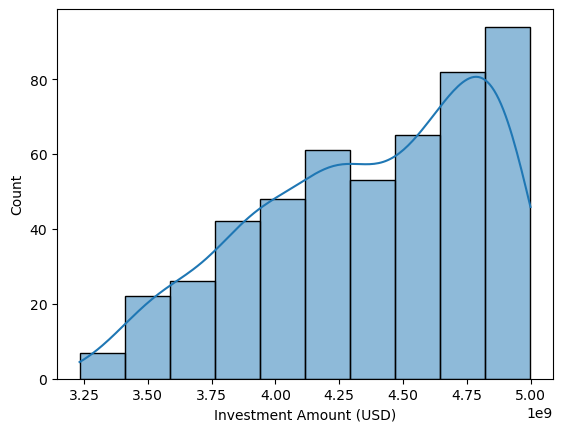

In [114]:
sns.histplot(high_startup['Investment Amount (USD)'], kde = True);

In [321]:
# Investment Amount is skewed to the left meaning to be a successful startup, you have to have enough Investment Amount

high_startup[['Investment Amount (USD)', 'Valuation (USD)']].corr() # shows high positive correlation

,Investment Amount (USD),Valuation (USD)
Investment Amount (USD),1.000000,0.539316
Valuation (USD),0.539316,1.000000


<Axes: xlabel='Country', ylabel='count'>

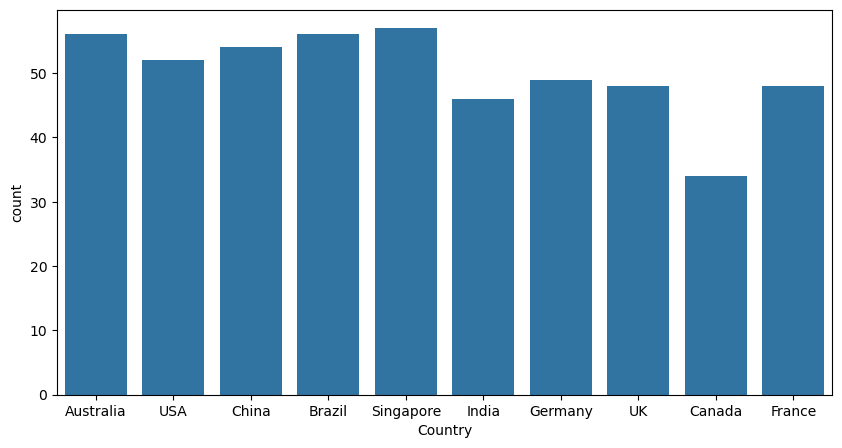

In [116]:
# 2.Check countries that fosters successful startups
high_startup['Country'].count

plt.figure(figsize = (10,5))
sns.countplot(data = high_startup, x = 'Country')

In [117]:
high_startup.groupby('Country')['Country'].count().sort_values( ascending = False) # singapore, Australia, Brazil and China has more high valued startups

Country
Singapore    57
Australia    56
Brazil       56
China        54
USA          52
Germany      49
France       48
UK           48
India        46
Canada       34
Name: Country, dtype: int64

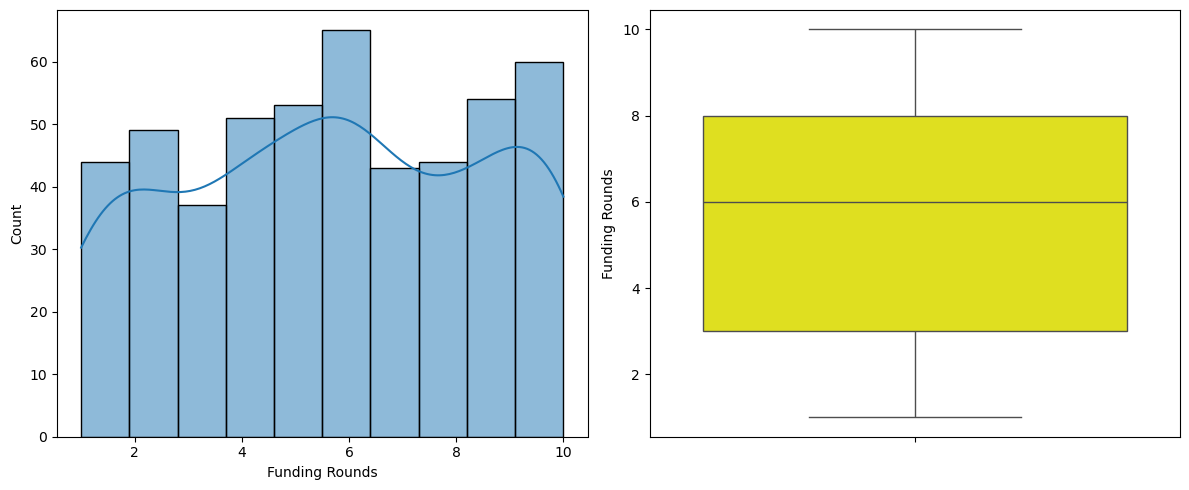

In [319]:
# 3. Analyse the funding rounds: Funding rounds might mean the trust of investors to pump more money into the startup
fig, axis = plt.subplots(1, 2, figsize = (12, 5))

sns.histplot(high_startup['Funding Rounds'], kde = True, ax = axis[0])
sns.boxplot(y=high_startup['Funding Rounds'], ax = axis[1], color = 'yellow')
plt.tight_layout()
# zero outlier

In [119]:
print(f'Average Funding Rounds: {high_startup['Funding Rounds'].median()}') # 6 suggests that successful companies requires more funding rounds

Average Funding Rounds: 6.0


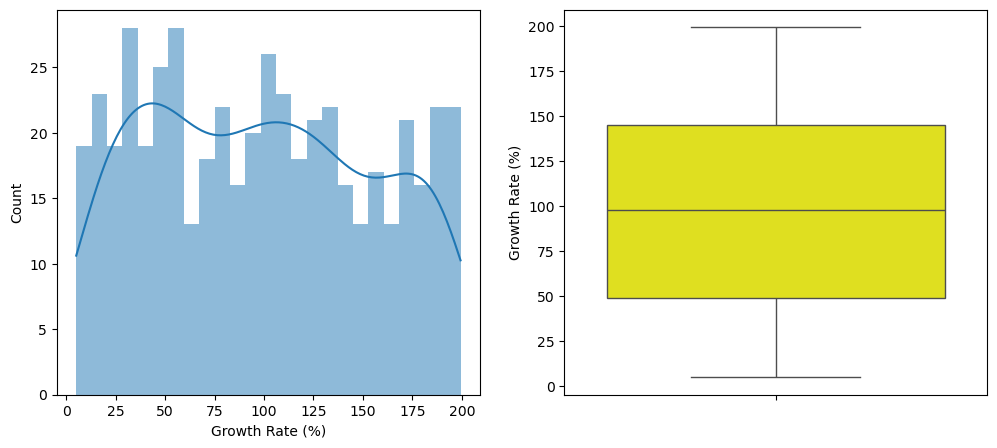

In [311]:
# 4. Analyze Growth Rate of high startups
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.histplot(high_startup['Growth Rate (%)'],bins = 25, kde = True, ax = axes[0], edgecolor = None)
sns.boxplot(y = high_startup['Growth Rate (%)'], ax = axes[1], color = 'yellow');


In [313]:
high_startup[['Growth Rate (%)', 'Valuation (USD)']].corr() # no correlation between growth rate and valuation, direction is also negative

,Growth Rate (%),Valuation (USD)
Growth Rate (%),1.000000,-0.062917
Valuation (USD),-0.062917,1.000000


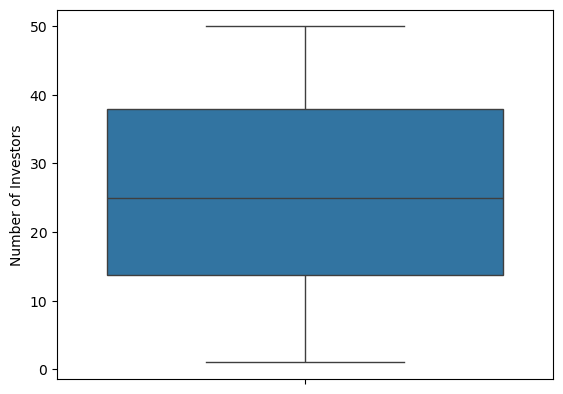

In [323]:
# 5. Analyze the Number of Investors of high valuation startups
sns.boxplot(high_startup['Number of Investors']); # No outlier

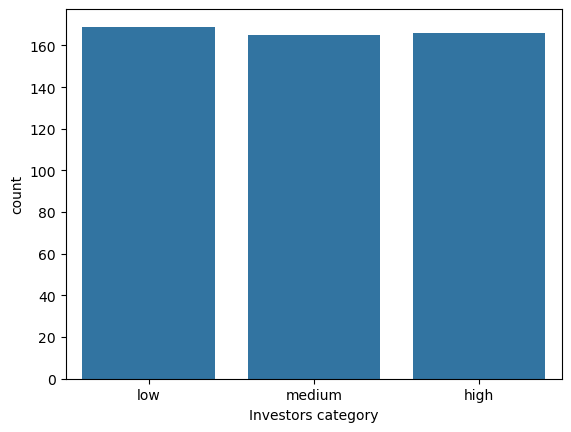

In [329]:
# I categorize Number of Investors earlier into categories known as Investors category
sns.countplot(x = high_startup['Investors category']);

In [ ]:
# No significant difference in the Investors amount in high startups

**2. Can we predict a startup’s valuation based on funding, industry, and growth rate?**

In [123]:
# Encode the categorical 'Industry' column using one-hot encoding
# This creates dummy variables and drops the first category to avoid multicollinearity
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=['Industry'], use_cat_names=True)
data1 = encoder.fit_transform(data)
data1 = data1.drop(columns=['Industry_AI'], axis = 1) 

In [124]:
X = data1[['Investment Amount (USD)', 'Growth Rate (%)'] + [col for col in data1.columns if col.startswith('Industry_')]]
y = data1['Valuation (USD)']
X.head()

,Investment Amount (USD),Growth Rate (%),Industry_Blockchain,Industry_SaaS,Industry_EdTech,Industry_Fintech,Industry_HealthTech,Industry_E-commerce,Industry_Biotech
0,1.335166e+09,77.10,1,0,0,0,0,0,0
1,2.781498e+09,105.52,0,1,0,0,0,0,0
2,3.309032e+09,190.47,0,0,1,0,0,0,0
3,4.050196e+09,9.44,0,0,0,1,0,0,0
4,1.645080e+09,192.00,0,0,1,0,0,0,0


In [125]:
# visualizing the target variable

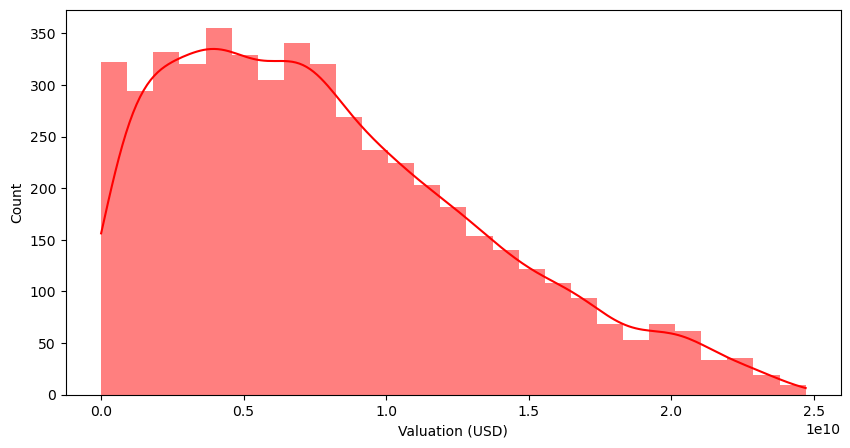

In [126]:
plt.figure(figsize = (10,5))
sns.histplot(y, kde = True, color = 'red', edgecolor = None)
plt.show()

In [127]:
# Valuation (USD) is heavily skewed
# Skewed valuation data can lead to:

#Biased predictions: Large outliers can disproportionately influence the model.
#Non-normal residuals: Linear regression assumes residuals are normally distributed, and skewness can violate this.
#Poor performance: Metrics like RMSE and MAE may be inflated due to extreme values.

In [128]:
# Log transforming the Valuation variable

In [129]:
y_log = np.log1p(y)

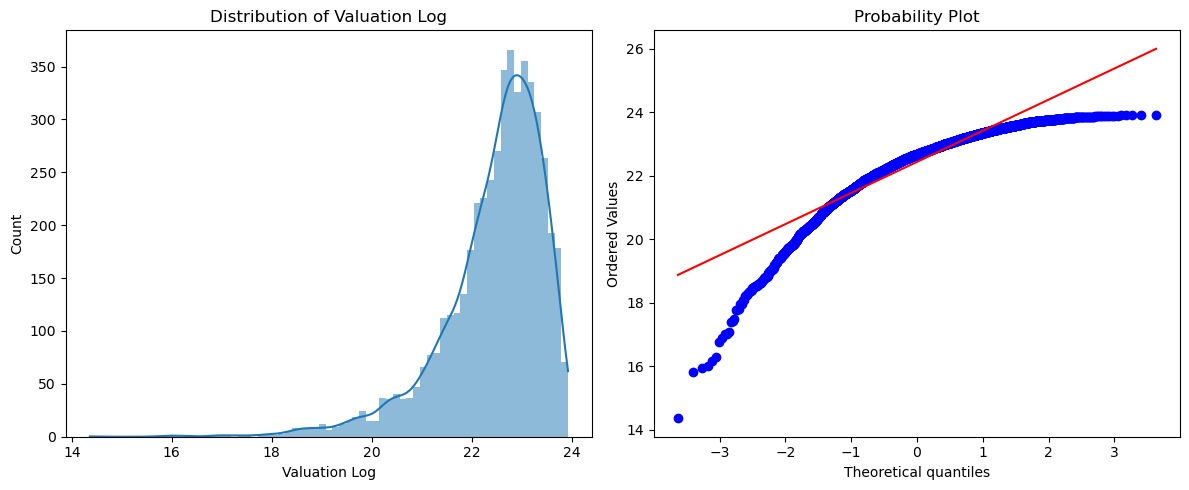

In [130]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with KDE on the first subplot
sns.histplot(y_log, kde=True, edgecolor=None, ax=axes[0])
axes[0].set_xlabel("Valuation Log")
axes[0].set_title("Distribution of Valuation Log")

# QQ plot (Probability Plot) on the second subplot
import scipy.stats as stats
stats.probplot(y_log, dist="norm", plot=axes[1])
axes[1].set_title("Probability Plot")

# Adjust layout and show
plt.tight_layout()
plt.show()

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 42)

In [133]:
len(X_train) == len(y_train)

True

In [134]:
# Build baseline model

In [135]:
y_baseline = y_train.mean()
y_pred_baseline = [y_baseline] * len(y_train)
y_pred_baseline[:5]

[22.434885240381714,
 22.434885240381714,
 22.434885240381714,
 22.434885240381714,
 22.434885240381714]

In [136]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [333]:
rmse = np.sqrt(mean_squared_error(y_pred_baseline, y_train))
print(f'Baseline RMSE: {rmse}')
print(f'Baseline MSE: {mean_squared_error(y_pred_baseline, y_train)}')
print(f'Baseline MAE: {mean_absolute_error(y_pred_baseline, y_train)}')
print(f'Baseline R2 score: {r2_score(y_pred_baseline, y_train)}')

Baseline RMSE: 1.049325903259648
Baseline MSE: 1.1010848512516764
Baseline MAE: 0.7769577039606067
Baseline R2 score: 0.0


In [335]:
model = LinearRegression()

In [337]:
model.fit(X_train, y_train)

LinearRegression()

In [339]:
y_train_pred = model.predict(X_train)

In [341]:
rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
print(f'LinearRegression training RMSE: {rmse}')
print(f'LinearRegression training MSE: {mean_squared_error(y_train_pred, y_train)}')
print(f'LinearRegression training MAE: {mean_absolute_error(y_train_pred, y_train)}')
print(f'LinearRegression training R2 score: {r2_score(y_train_pred, y_train)}')

LinearRegression training RMSE: 0.6000221768584871
LinearRegression training MSE: 0.3600266127219976
LinearRegression training MAE: 0.42843202882663817
LinearRegression training R2 score: 0.5141723092690798


In [343]:
y_pred = model.predict(X_test)

In [347]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(f'LinearRegression test RMSE: {rmse}')
print(f'LinearRegression test MSE: {mean_squared_error(y_pred, y_test)}')
print(f'LinearRegression test MAE: {mean_absolute_error(y_pred, y_test)}')
print(f'LinearRegression test R2 score: {r2_score(y_pred, y_test)}')

LinearRegression test RMSE: 0.5868023461064518
LinearRegression test MSE: 0.34433699339603596
LinearRegression test MAE: 0.41735160128627913
LinearRegression test R2 score: 0.5237731641307748


In [144]:
input_data = pd.DataFrame({
    'Investment Amount (USD)': [1.335166e+09],
    'Growth Rate (%)': [77.10],
    'Industry_Blockchain': [1],  
    'Industry_SaaS': [0],
    'Industry_EdTech': [0],
    'Industry_Fintech': [0],
    'Industry_HealthTech': [0],
    'Industry_E-commerce':[0],
    'Industry_Biotech':[0],
})

In [145]:
y_pred_log = model.predict(input_data)

In [146]:
y_pred_original = np.expm1(y_pred_log)
print(f"Predicted Valuation: ${y_pred_original[0]:,.2f}")

Predicted Valuation: $2,836,216,174.65


In [147]:
print(f"Original Valuation: ${y[0]:,.2f}")

Original Valuation: $6,621,448,041.82


#### Model predicts $2,836,216,174.65  while the actual valuation is  $6,621,448,041.82. This might be due to low represenation of high valued companies in dataset

In [149]:
input_data = pd.DataFrame({
    'Investment Amount (USD)': [3.309032e+09],
    'Growth Rate (%)': [190.47],
    'Industry_Blockchain': [0],  
    'Industry_SaaS': [0],
    'Industry_EdTech': [1],
    'Industry_Fintech': [0],
    'Industry_HealthTech': [0],
    'Industry_E-commerce':[0],
    'Industry_Biotech':[0],
})

In [150]:
y_log_pred = model.predict(input_data)
y_pred = np.expm1(y_log_pred)
print(f"Predicted Valuation: ${y_pred[0]:,.2f}")

Predicted Valuation: $9,637,926,264.08


In [151]:
Original_Valuation = data[np.isclose(data['Investment Amount (USD)'], 3.309032e+09) & (data['Industry'] == 'EdTech')]['Valuation (USD)']
print(f"Original Valuation: ${Original_Valuation.values[0]:,.2f}")

Original Valuation: $15,482,697,353.10


**3. Which startups are on track to become unicorns ($1B+ valuation)?**

In [153]:
# Query Startups that have less than $1B in valuation and Growth Rate greater than 0
pre_data = data.query("`Valuation (USD)` < 1e9 and `Growth Rate (%)` > 0")[['Startup Name','Valuation (USD)', 'Growth Rate (%)']]

In [154]:
pre_data.head()

,Startup Name,Valuation (USD),Growth Rate (%)
100,Startup_101,8.660571e+08,14.62
108,Startup_109,5.791224e+08,6.85
116,Startup_117,6.315901e+08,10.75
121,Startup_122,8.936817e+08,139.11
122,Startup_123,3.533315e+07,61.10


In [155]:
# We would predict in a period of 5 years using the formula: Vproj = Current Valuation×(1+ (Growth Rate/100)decay)^years

In [359]:
def unicorn_function(df, data, decay = 0.9, years = 5):
    upcoming_unicorn = []
    for index, row in df.iterrows():
        name = row['Startup Name']
        valuation = row['Valuation (USD)']
        growth_rate = row['Growth Rate (%)']
        V = valuation*(1 + (growth_rate/100) * decay)**years
        if V >= 1e9:
            upcoming_unicorn.append(name)
            filtered_data = data[data['Startup Name'].isin(upcoming_unicorn)].reset_index(drop = True)
    return upcoming_unicorn, filtered_data


    
# Introducing a decay factor (e.g., 0.9) simulates diminishing growth over time, making projections more realistic. This is more effective for long-term forecasting.

In [355]:
potential_unicorn, unicorn_data = unicorn_function(pre_data, data)

In [357]:
unicorn_data

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%),Investors category
0,Startup_101,Fintech,3,2.223996e+08,8.660571e+08,9,UK,2005,14.62,low
1,Startup_117,HealthTech,5,2.970374e+08,6.315901e+08,27,Germany,2022,10.75,medium
2,Startup_122,HealthTech,7,3.597070e+08,8.936817e+08,45,Australia,2007,139.11,high
3,Startup_190,HealthTech,1,4.439398e+08,6.973798e+08,33,USA,2023,102.51,medium
4,Startup_196,Biotech,8,1.685655e+08,7.271956e+08,5,UK,2013,171.90,low
...,...,...,...,...,...,...,...,...,...,...
303,Startup_4915,SaaS,10,4.835621e+07,1.829380e+08,28,Australia,2003,85.70,medium
304,Startup_4923,Biotech,2,3.664733e+06,1.043462e+07,9,UK,2000,189.82,low
305,Startup_4929,Fintech,1,3.331147e+08,9.950041e+08,40,USA,2004,105.08,high
306,Startup_4980,AI,1,4.073534e+08,8.064434e+08,45,USA,2004,75.18,high
